In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
data_dynamic1 = pd.read_csv(r"06.2.w_e_030321_fcdDynamicData.csv")
data_dynamic2 = pd.read_csv(r"06.2.w_e_040321_fcdDynamicData.csv")
data_dynamic3 = pd.read_csv(r"06.2.w_e_050321_fcdDynamicData.csv")
#data_dynamic4 = pd.read_csv(r"06.2.w_e_150321_fcdDynamicData.csv");

data_static = pd.read_csv(r"06.2.w_e_fcdStaticData.csv")

In [2]:

d1 = pd.concat((data_dynamic1,data_dynamic2),axis = 0)

df = pd.concat((d1,data_dynamic3),axis = 0)

df



,discoveryTime,segmentId,travelTime,coverage
0,2021-03-03 00:00:00,131016,1576,10
1,2021-03-03 00:00:00,134879,1311,10
2,2021-03-03 00:00:00,135146,1539,10
3,2021-03-03 00:00:00,182928,1769,10
4,2021-03-03 00:00:00,182929,1769,10
...,...,...,...,...
88401,2021-03-05 23:55:00,7425668,3062,10
88402,2021-03-05 23:55:00,7425669,3062,10
88403,2021-03-05 23:55:00,7452950,3480,10
88404,2021-03-05 23:55:00,7452951,2036,10


In [3]:
df1 = df.merge(data_static, on='segmentId', how='left') # how = 'left' ????????

df1["travelTime"] = df1["travelTime"]*2.77777778 * (1/10000000)

df1["lengthmm"] = df1["lengthmm"]*(1/1000000)

df1 = df1.drop("coverage", axis=1)


df2= pd.DataFrame(df1)

df2['speed'] = df1["lengthmm"] / df1["travelTime"]

df2

,discoveryTime,segmentId,travelTime,lengthmm,speedLimitKph,speed
0,2021-03-03 00:00:00,131016,0.000438,0.030651,70,70.014975
1,2021-03-03 00:00:00,134879,0.000364,0.025508,70,70.044851
2,2021-03-03 00:00:00,135146,0.000428,0.029935,70,70.023392
3,2021-03-03 00:00:00,182928,0.000491,0.034413,70,70.032108
4,2021-03-03 00:00:00,182929,0.000491,0.034413,70,70.032108
...,...,...,...,...,...,...
263391,2021-03-05 23:55:00,7425668,0.000851,0.042529,50,50.001437
263392,2021-03-05 23:55:00,7425669,0.000851,0.042529,50,50.001437
263393,2021-03-05 23:55:00,7452950,0.000967,0.048346,50,50.013103
263394,2021-03-05 23:55:00,7452951,0.000566,0.028279,50,50.002161


In [4]:
"""df2.set_index("discoveryTime",inplace=True)
df2.index=pd.to_datetime(df2.index)
df2
"""

'df2.set_index("discoveryTime",inplace=True)\ndf2.index=pd.to_datetime(df2.index)\ndf2\n'

In [5]:

x_data = df2[["discoveryTime","speed"]]

x_data = x_data.groupby(by="discoveryTime").mean()
x_data

,speed
discoveryTime,
2021-03-03 00:00:00,64.138875
2021-03-03 00:05:00,64.211206
2021-03-03 00:10:00,64.821525
2021-03-03 00:15:00,64.954536
2021-03-03 00:20:00,65.083650
...,...
2021-03-05 23:35:00,64.150973
2021-03-05 23:40:00,64.394271
2021-03-05 23:45:00,64.689910


<AxesSubplot:xlabel='segmentId'>

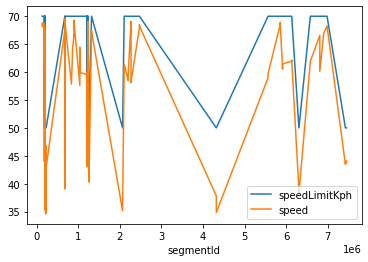

In [6]:
x_data1 = df2[["segmentId","speedLimitKph","speed"]]

x_data2 = x_data1.groupby(by="segmentId").mean()
x_data2.plot()


In [7]:
#x_data.set_index("discoveryTime",inplace=True)
x_data.index=pd.to_datetime(x_data.index)
x_data.index = pd.DatetimeIndex(x_data.index).to_period('5min')
x_data.index = x_data.index.to_timestamp(freq ='5min')

In [8]:
from statsmodels.tsa.stattools import adfuller


result=adfuller(x_data['speed'])


dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -6.731259850622079,
 'pvalue': 3.291537103281233e-09,
 'usedlag': 4,
 'nobs': 846,
 'criticalvalues': {'1%': -3.4381032536542913,
  '5%': -2.8649624121419746,
  '10%': -2.5685923644574107},
 'icbest': 2152.9385198766518}

In [9]:
x_data['1difference']=x_data['speed']-x_data['speed'].shift(1)

<AxesSubplot:xlabel='discoveryTime'>

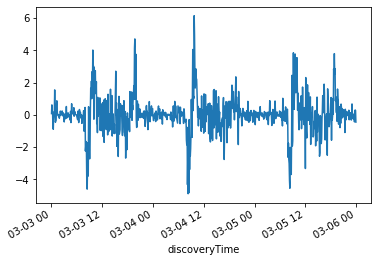

In [10]:
x_data['1difference'].plot()

In [11]:
result=adfuller(x_data['1difference'].dropna())
result

(-8.468412572304974,
 1.500491800701707e-13,
 11,
 838,
 {'1%': -3.4381774989729816,
  '5%': -2.8649951426291,
  '10%': -2.568609799556849},
 2179.264898067715)

<AxesSubplot:xlabel='discoveryTime'>

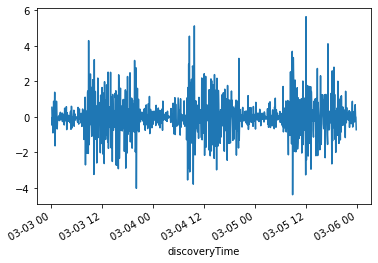

In [12]:
x_data['2difference']=x_data['1difference']-x_data['1difference'].shift(1)
x_data['2difference'].plot()

In [13]:
result=adfuller(x_data['2difference'].dropna())
result

(-10.464101121877146,
 1.3355441535821057e-18,
 20,
 828,
 {'1%': -3.438272329479064,
  '5%': -2.8650369467745573,
  '10%': -2.568632068251301},
 2225.719989467276)

In [14]:
x_data

,speed,1difference,2difference
discoveryTime,,,
2021-03-03 00:00:00,64.138875,NaN,NaN
2021-03-03 00:05:00,64.211206,0.072331,NaN
2021-03-03 00:10:00,64.821525,0.610320,0.537989
2021-03-03 00:15:00,64.954536,0.133011,-0.477308
2021-03-03 00:20:00,65.083650,0.129113,-0.003898
...,...,...,...
2021-03-05 23:35:00,64.150973,-0.444449,-0.195094
2021-03-05 23:40:00,64.394271,0.243299,0.687747
2021-03-05 23:45:00,64.689910,0.295639,0.052340


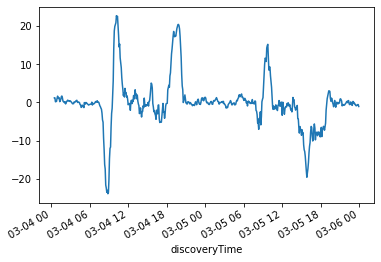

In [15]:
x_data['Seasonal_Difference']=x_data['speed']-x_data['speed'].shift(288)


ax=x_data['Seasonal_Difference'].plot()

In [16]:
result=adfuller((x_data['Seasonal_Difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -6.171138439460027,
 'pvalue': 6.800840604334454e-08,
 'usedlag': 5,
 'nobs': 557,
 'criticalvalues': {'1%': -3.4421447800270673,
  '5%': -2.8667429272780858,
  '10%': -2.5695409929766093},
 'icbest': 1726.210552474035}

In [17]:
x_data['Seasonal_Difference1']=x_data['Seasonal_Difference']-x_data['Seasonal_Difference'].shift(288)

In [18]:
result=adfuller(x_data['Seasonal_Difference1'].dropna())
result

(-4.066963531204109,
 0.00109773461918407,
 5,
 269,
 {'1%': -3.4548957220044336,
  '5%': -2.8723451788613157,
  '10%': -2.572527778361272},
 1082.7346657981102)

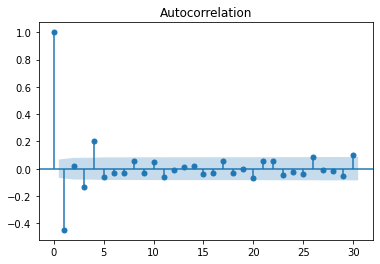

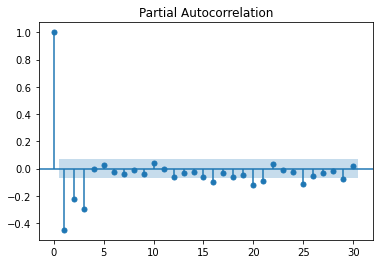

In [19]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig1=plot_acf(x_data['2difference'].dropna())

fig2=plot_pacf(x_data['2difference'].dropna())





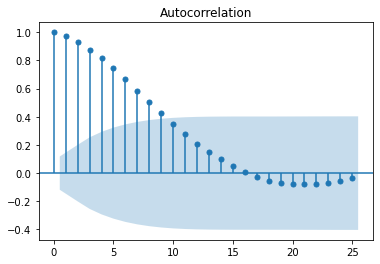

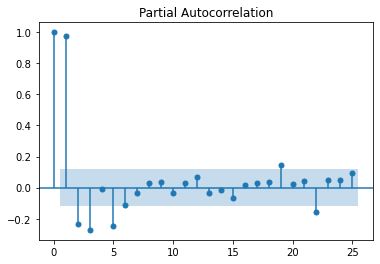

In [20]:
fig1=plot_acf(x_data['Seasonal_Difference1'].dropna())

fig2=plot_pacf(x_data['Seasonal_Difference1'].dropna())

In [21]:
x_data.index = pd.DatetimeIndex(x_data.index).to_period('5min')



In [22]:
"""
mod = sm.tsa.statespace.SARIMAX(x_data.riders, trend='n', order=(1,2,1), seasonal_order=(0,1,0,288))
results = mod.fit()
print results.summary()
"""



from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(x_data['speed'],order=(0,2,0),seasonal_order=(0, 1, 0, 288))
result=model.fit()




In [23]:
#print(result.summary())

In [24]:
#result.resid.plot(kind='kde')

In [25]:
x_data.index = x_data.index.to_timestamp(freq ='5min')

In [26]:
from pandas.tseries.offsets import DateOffset


new_dates=[x_data.index[-1]+ DateOffset(minutes=x) for x in range(5,5000,5)]

df_pred=pd.DataFrame(index=new_dates, columns =x_data.columns)


df_pred1 = pd.concat([x_data,df_pred],axis = 0)

In [27]:
df_pred1.index = pd.DatetimeIndex(df_pred1.index).to_period('5min')



In [28]:


#df_pred.index = df_pred.index.to_timestamp(freq ='5min')


<AxesSubplot:>

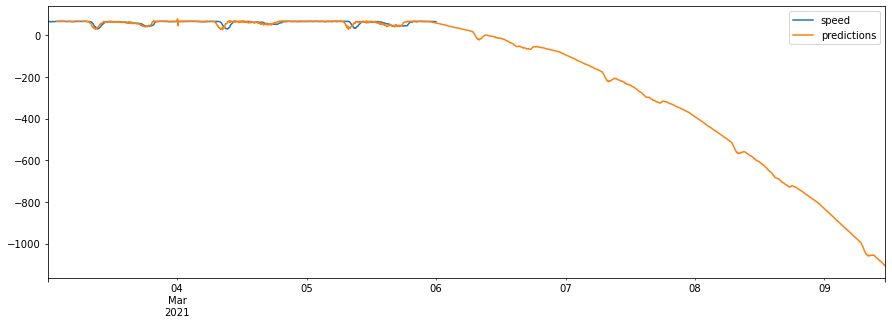

In [30]:


df_pred1['predictions'] = result.predict(start=20,end=2000)
df_pred1[["speed","predictions"]].plot(figsize=(15,5))



In [30]:
df_pred1.head(2000)

,speed,1difference,2difference,Seasonal_Difference,Seasonal_Difference1,predictions
2021-03-03 00:00:00,64.138875,NaN,NaN,NaN,NaN,NaN
2021-03-03 00:05:00,64.211206,0.072331,NaN,NaN,NaN,NaN
2021-03-03 00:10:00,64.821525,0.610320,0.537989,NaN,NaN,NaN
2021-03-03 00:15:00,64.954536,0.133011,-0.477308,NaN,NaN,NaN
2021-03-03 00:20:00,65.083650,0.129113,-0.003898,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-03-09 10:50:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 10:55:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-09 11:05:00,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data_dynamic1 = pd.read_csv(r"06.2.w_e_030321_fcdDynamicData.csv")
data_dynamic2 = pd.read_csv(r"06.2.w_e_040321_fcdDynamicData.csv")
data_dynamic3 = pd.read_csv(r"06.2.w_e_050321_fcdDynamicData.csv")

In [3]:
df1 = data_dynamic1.merge(data_static, on='segmentId', how='left') # how = 'left' ????????
df2 = data_dynamic2.merge(data_static, on='segmentId', how='left') # how = 'left' ????????
df3 = data_dynamic3.merge(data_static, on='segmentId', how='left') # how = 'left' ????????

In [4]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()

df1.sort_values(by = "segmentId", ascending=True)

df1["segmentId"] = le1.fit_transform(df1["segmentId"])


df2.sort_values(by = "segmentId", ascending=True)

df2["segmentId"] = le1.fit_transform(df2["segmentId"])

df3.sort_values(by = "segmentId", ascending=True)

df3["segmentId"] = le1.fit_transform(df3["segmentId"])




In [5]:

d1 = pd.concat((df1,df2),axis = 0)

df = pd.concat((d1,df3),axis = 0)

df

,discoveryTime,segmentId,travelTime,coverage,lengthmm,speedLimitKph
0,2021-03-03 00:00:00,0,1576,10,30651,70
1,2021-03-03 00:00:00,1,1311,10,25508,70
2,2021-03-03 00:00:00,2,1539,10,29935,70
3,2021-03-03 00:00:00,3,1769,10,34413,70
4,2021-03-03 00:00:00,4,1769,10,34413,70
...,...,...,...,...,...,...
88401,2021-03-05 23:55:00,302,3062,10,42529,50
88402,2021-03-05 23:55:00,303,3062,10,42529,50
88403,2021-03-05 23:55:00,304,3480,10,48346,50
88404,2021-03-05 23:55:00,305,2036,10,28279,50


In [6]:

df["travelTime"] = df["travelTime"]*2.77777778 * (1/10000000)

df["lengthmm"] = df["lengthmm"]*(1/1000000)
df1 = df.drop("coverage", axis=1)

df11= pd.DataFrame(df1)
df11['speed'] = df1["lengthmm"] / df1["travelTime"]
df11 = df11.reset_index().drop("index", axis=1)

df11

,discoveryTime,segmentId,travelTime,lengthmm,speedLimitKph,speed
0,2021-03-03 00:00:00,0,0.000438,0.030651,70,70.014975
1,2021-03-03 00:00:00,1,0.000364,0.025508,70,70.044851
2,2021-03-03 00:00:00,2,0.000428,0.029935,70,70.023392
3,2021-03-03 00:00:00,3,0.000491,0.034413,70,70.032108
4,2021-03-03 00:00:00,4,0.000491,0.034413,70,70.032108
...,...,...,...,...,...,...
263391,2021-03-05 23:55:00,302,0.000851,0.042529,50,50.001437
263392,2021-03-05 23:55:00,303,0.000851,0.042529,50,50.001437
263393,2021-03-05 23:55:00,304,0.000967,0.048346,50,50.013103
263394,2021-03-05 23:55:00,305,0.000566,0.028279,50,50.002161


<AxesSubplot:xlabel='segmentId'>

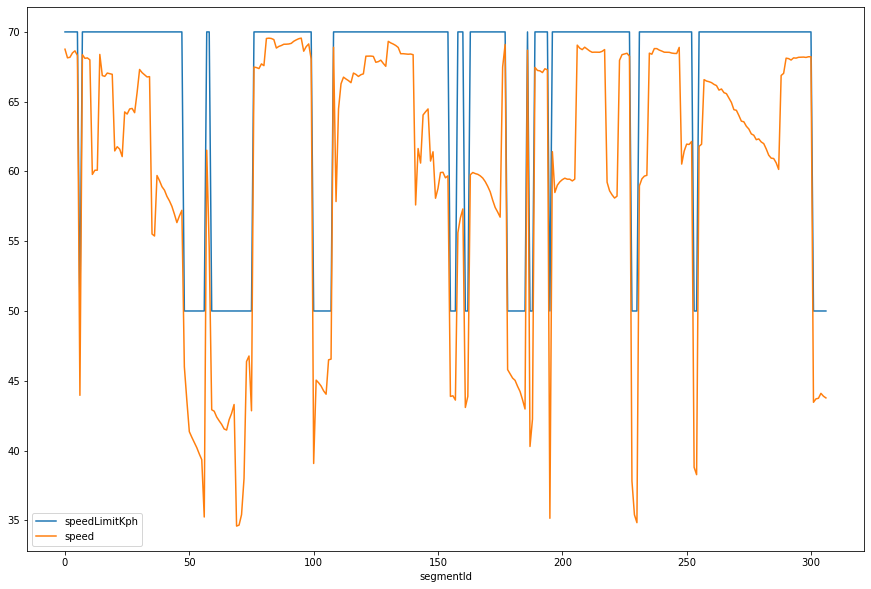

In [17]:
x_data1 = df11[["segmentId","speedLimitKph","speed"]]

x1_data = x_data1.groupby(by="segmentId").mean()               #????

x1_data.plot(figsize=(15,10))

In [8]:
df_segment = x1_data["speed"]<40

df1 = df_segment.reset_index()

df1.drop(df1[df1['speed'] == False].index, inplace=True)

df1["segmentId"].unique()

array([ 54,  55,  56,  69,  70,  71,  72, 100, 195, 228, 229, 230, 253,
       254], dtype=int64)

In [11]:
def segmentId(k):
    df_segment = df11["segmentId"] == k

    dff = df_segment.reset_index()

    dff = dff.drop("index", axis=1)

    dff["ss"] = dff["segmentId"]

    dff1 = pd.concat((df11,dff),axis = 1)


    dff1.drop(dff1[dff1['ss'] == False].index, inplace=True)


    return dff1


In [12]:

dff1 = segmentId(54)

<AxesSubplot:xlabel='discoveryTime'>

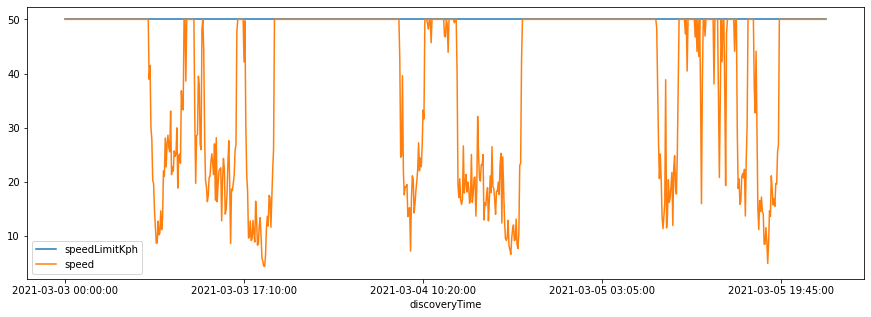

In [15]:
    
x_data = dff1[["discoveryTime","speedLimitKph","speed"]]

x_data.set_index("discoveryTime")

x_data.groupby(by="discoveryTime").mean().plot(figsize=(15,5))